In [1]:
%matplotlib inline

First, as always, we will import some basic stuff, and define some constants

In [2]:
import numpy as np
from scipy.signal import butter, lfilter    # our signal filter tool
import matplotlib.pyplot as plt

In [3]:
textIn = np.load('textin.npy', allow_pickle=False)
textOut = np.load('textOut.npy', allow_pickle=False)
traces = np.load('traces.npy', allow_pickle=False)

In [4]:
InvSbox = (0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
           0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
           0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
           0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
           0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
           0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
           0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
           0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
           0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
           0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
           0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
           0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
           0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
           0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
           0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
           0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d)

Sbox = (0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

In [5]:
# round constants and hamming weight pre-calculated

rcon = [0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36]

hamming = [bin(i)[2:].count("1") for i in range(256)]

Now we move forward to devote few basic procedures to a certain function each for clarity

In [6]:
def cor(x, y):    # Pearson correlation coefficient
    return np.corrcoef(x, y)[1, 0]

In [7]:
def filter(trace):    # application of butterworth filter
    b, a = butter(4, 0.6, btype='low')
    clean = lfilter(b, a, trace)
    return clean

In [8]:
def filter_all(traces):    # now we extend this func to all traces, and save result to a new file
    res = []
    for t in traces:
        clean = filter(t)
        res.append(clean)
    np.save('clearedTraces', np.array(res))
    return res

Now let's take a look at result

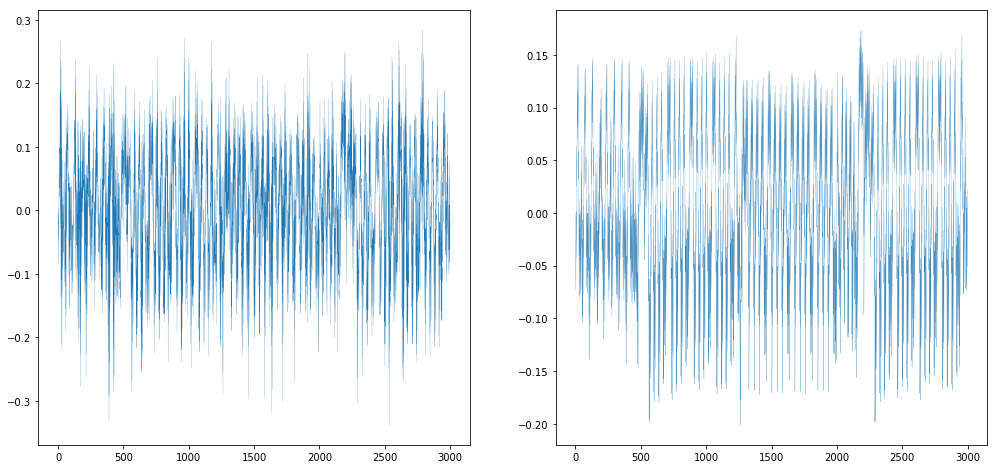

In [13]:
filtered = np.load('clearedTraces.npy', allow_pickle=False)
fig = plt.gcf()
fig.set_size_inches(17, 8)
plt.subplot(1, 2, 1)
plt.plot(traces[0], linewidth=0.2)
plt.subplot(1, 2, 2)
plt.plot(filtered[0], linewidth=0.2)
plt.show()

In [11]:
def getPrediction(textOut, byteNum, byteVal):    # here we buld prediction throughout all output data
    prediction = np.zeros(len(textOut))
    for i in range(len(textOut)):
        x = InvSbox[textOut[i][byteNum] ^ byteVal]
        prediction[i] = hamming[x]
    return prediction

In [12]:
def guessKey(textOut, traces):    # same guess key func as it was in first task, except now we get last round key which requires
    key = np.zeros(16)            # further processing to derive an initial key
    for byte_num in range(16):
        tmpRes = [0 for i in range(256)]
        for byte_val in range(256):
            # print(byte_val)
            mxVal = 0
            mxIndx = None
            prediction = getPrediction(textOut, byte_num, byte_val)
            for i, sample in enumerate(zip(*traces)):
                correlation = cor(prediction, sample)
                if abs(correlation) > mxVal:
                    mxVal = abs(correlation)
                    mxIndx = i
            tmpRes[byte_val] = (mxVal, mxIndx)
        b = max(enumerate(tmpRes), key=lambda x: x[1][0])
        msg = 'byte number: {}\nbyte value:{}\ncorrelation value:{}\nleakage place:{}\n\n\n'
        print(msg.format(byte_num, b[0], b[1][0], b[1][1]))
        key[byte_num] = b[0]
    return key


In [14]:
# we will hardcode result, so we don't have to wait another 40 min's to generate it here

last_key = [160, 18, 2, 26, 245, 5, 43, 216, 26, 128, 193, 217, 6, 28, 217, 240]

Now we will implement reverse key-scheduling to derive initial key from last round key

In [15]:
def invRotWord(word):
    res = list(word[1:]) + list([word[0]])
    return np.array(res)

def subBytes(word):
    res = [Sbox[w] for w in word]
    return np.array(res)

def revertRoundKey(oldKey, rConst):
    newKey = [[0 for k in range(4)] for j in range(4)]
    for i in range(3, 0, -1):                               # last three columns
        c1 = np.array([oldKey[j][i] for j in range(4)])
        c2 = np.array([oldKey[j][i-1] for j in range(4)])
        c1c2 = c1 ^ c2
        for j in range(4):
            newKey[j][i] = c1c2[j]
    oldFirstColumn = np.array([row[0] for row in oldKey])   # first column
    newLastColumn = np.array([row[3] for row in newKey])
    newFirstColumn = oldFirstColumn  ^ subBytes(invRotWord(newLastColumn)) ^ rConst
    for i in range(4):
        newKey[i][0] = newFirstColumn[i]
    return newKey


In [17]:
oldKey = [[160, 245, 26, 6],
              [18, 5, 128, 28],
              [2, 43,193, 217],
              [26, 216, 217, 240]]

for i in range(10):
    oldKey = revertRoundKey(oldKey, np.array([rcon[10 - i], 0, 0, 0]))
print(np.matrix(oldKey))
res = [84, 65, 124, 60, 51, 32, 84, 124, 45, 124, 51, 32, 82, 49, 53, 107]
print(bytes(res))

[[ 84  51  45  82]
 [ 65  32 124  49]
 [124  84  51  53]
 [ 60 124  32 107]]
b'TA|<3 T|-|3 R15k'
